In [31]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [32]:
df  = pd.read_csv("diabetes.csv")

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
x = df.iloc[:,:-1].values

In [35]:
y = df.Outcome

In [36]:
import sklearn
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state =0, train_size =0.70)

In [38]:
x_train

array([[0.00e+00, 1.51e+02, 9.00e+01, ..., 4.21e+01, 3.71e-01, 2.10e+01],
       [1.00e+00, 8.30e+01, 6.80e+01, ..., 1.82e+01, 6.24e-01, 2.70e+01],
       [2.00e+00, 1.22e+02, 7.00e+01, ..., 3.68e+01, 3.40e-01, 2.70e+01],
       ...,
       [4.00e+00, 9.40e+01, 6.50e+01, ..., 2.47e+01, 1.48e-01, 2.10e+01],
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 0.00e+00, 6.40e-01, 6.90e+01]])

In [39]:
import tensorflow as tf


In [40]:
print(tf.__version__)

2.12.0


In [41]:
from keras.models import Sequential

In [42]:
model = Sequential()

In [43]:
from keras.layers import Dense

In [44]:
#add first hidden layer
model.add(Dense(32,activation='relu',input_dim = 8))

In [45]:
#second hidden layer
model.add(Dense(16,activation='relu'))


In [46]:
#output layer
model.add(Dense(1,activation='sigmoid'))

In [47]:
#compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
#training for 100 epochs
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
17/17 [==============================] - 2s 4ms/step - loss: 2.6085 - accuracy: 0.4916
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 1.3218 - accuracy: 0.5717
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 1.0534 - accuracy: 0.5605
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.9533 - accuracy: 0.5903
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8781 - accuracy: 0.6108
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8247 - accuracy: 0.6276
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7607 - accuracy: 0.6350
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7299 - accuracy: 0.6369
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.7135 - accuracy: 0.6331
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6696 - accuracy: 0.6331
Epoch 11/

17/17 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7225
Epoch 84/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5117 - accuracy: 0.7449
Epoch 85/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.7020
Epoch 86/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4956 - accuracy: 0.7728
Epoch 87/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7561
Epoch 88/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4871 - accuracy: 0.7467
Epoch 89/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7579
Epoch 90/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5105 - accuracy: 0.7374
Epoch 91/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7505
Epoch 92/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7579
Epoch 93/100


In [49]:
scores = model.evaluate(x_train,y_train)

17/17 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.7654


In [50]:
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

Training Accuracy: 76.54%



In [51]:
scores = model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 4ms/step - loss: 0.5819 - accuracy: 0.7186


In [52]:
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Testing Accuracy: 71.86%



In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
y_test_pred=(model.predict(x_test)>0.5).astype("int32")

8/8 [==============================] - 0s 5ms/step


In [55]:
cm = confusion_matrix(y_test,y_test_pred)
print(cm)

[[125  32]
 [ 33  41]]


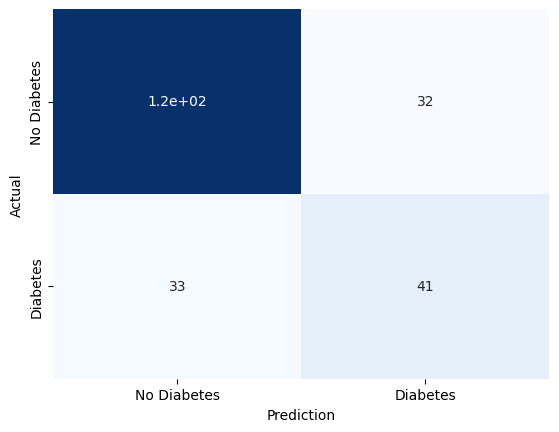

In [56]:
ax = sns.heatmap(cm, annot=True, xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()